In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Load California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Fetch the data
housing = fetch_california_housing(as_frame=True)

# Convert to a DataFrame
data = housing.frame

# Display the first 5 rows
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Check basic info

Describe statistics

Check for missing values

Understand the target variable

Shape of dataset: (20640, 9)

Column names:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

Data types:

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Descriptive statistics:

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.

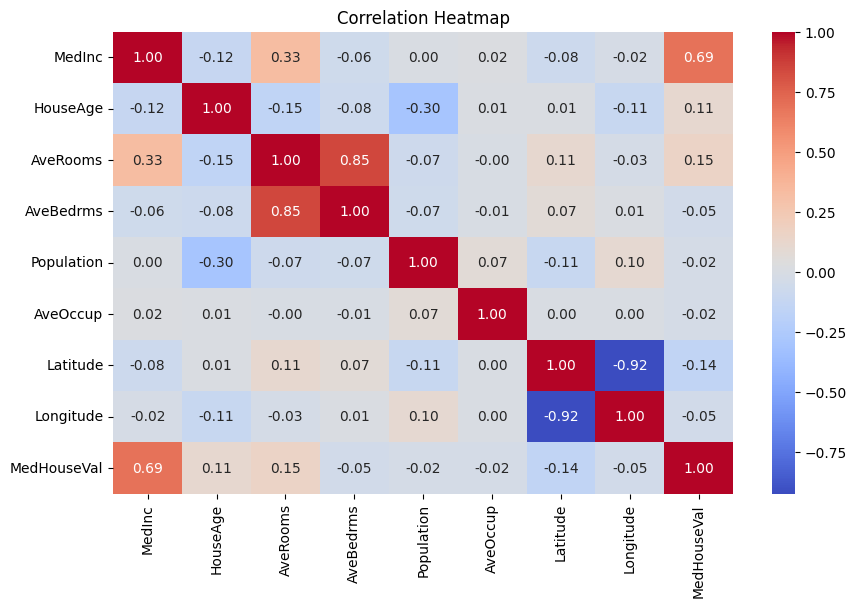

In [3]:
# Step 2.1: Basic info about the dataset
print("Shape of dataset:", data.shape)
print("\nColumn names:\n", data.columns.tolist())
print("\nData types:\n")
print(data.dtypes)

# Step 2.2: Descriptive statistics
print("\nDescriptive statistics:\n")
print(data.describe())

# Step 2.3: Check for missing/null values
print("\nMissing values:\n")
print(data.isnull().sum())

# Step 2.4: Correlation with target variable
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Visualize Important Features
We’ll plot:

Distributions of key features

Relationship with the target variable (MedHouseVal)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


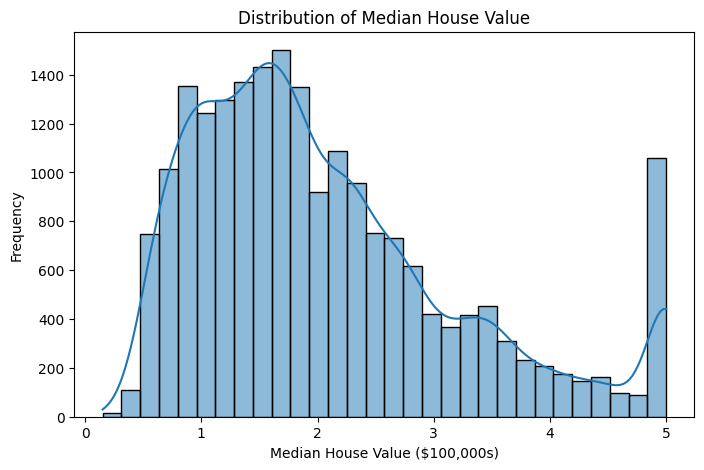

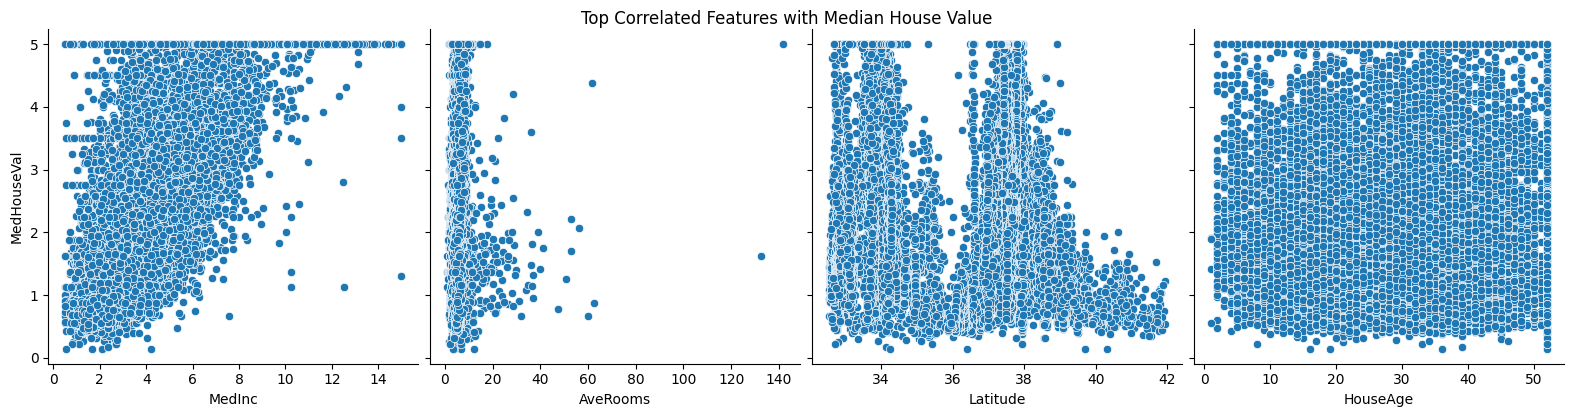

In [4]:
# Step 3.1: Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(data['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()

# Step 3.2: Pairplots of top correlated features with target
top_corr_features = data.corr()['MedHouseVal'].abs().sort_values(ascending=False)[1:5].index.tolist()
sns.pairplot(data, x_vars=top_corr_features, y_vars='MedHouseVal', height=4, aspect=1, kind='scatter')
plt.suptitle('Top Correlated Features with Median House Value', y=1.02)
plt.show()


## Prepare Data for Linear Regression
We'll:

Define features (X) and target (y)

Split the dataset into training and testing sets

Apply feature scaling (important for regression)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 4.1: Define X and y
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Step 4.2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4.3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train the Linear Regression Model
We’ll:

Import and fit the Linear Regression model using training data

In [6]:
from sklearn.linear_model import LinearRegression

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

## Evaluate the Linear Regression Model
We’ll:

Predict on the test set

Evaluate using R² Score and RMSE (Root Mean Squared Error)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 6: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.58
RMSE: 0.75


## Visualize Actual vs Predicted Values
This step will help you understand the accuracy of your model by comparing the actual vs predicted house prices.

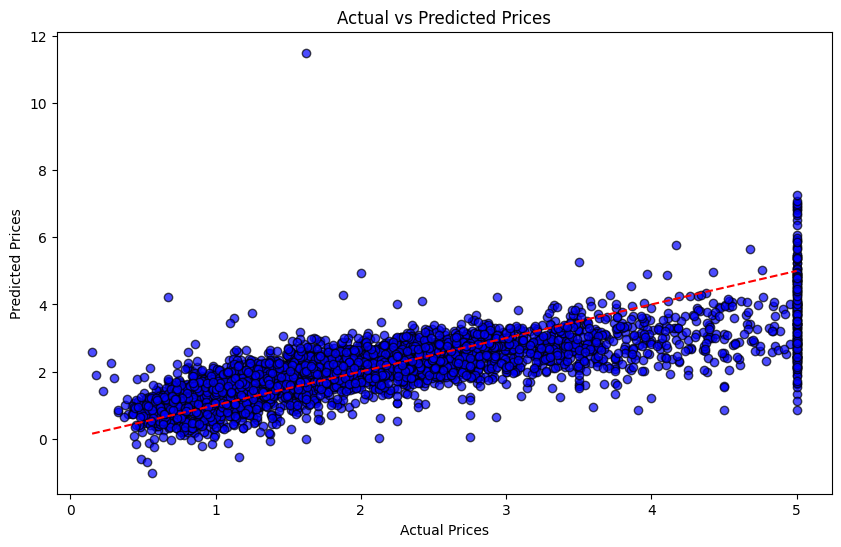

In [8]:
import matplotlib.pyplot as plt

# Step 7: Plot Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
